In [2]:
import numpy as np
import pandas as pd
import sys
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
#Read training data file
train_df = pd.read_csv("/Users/davidli/Documents/ASU/CIS508/week4/hw1/train.csv")

#Read testing data file
test_df = pd.read_csv("/Users/davidli/Documents/ASU/CIS508/week4/hw1/test.csv")
ID = test_df["ID"]

In [4]:
#Showing heads 5 of training data
#train_df.head()

#Showing heads 5 of testing data
test_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [5]:
#Data Description
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
train_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
#ProfileReport(train_df, minimal=True) 

In [8]:
# To check number of null values
train_df.isna().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [9]:
#Divide training data file to training data(train_Data) and training target(train_Target)
#Copy Train target(train_Target) excluding Train data
train_Target = np.array(train_df["TARGET"])

#Copy Train data(train_Data) excluding Traning target WITHOUT column of "ID"
#train_df.shape[1] is # of train_df columns 
#Minus 2, one is for target, one is for ID
train_Data = np.ones((train_df.shape[0],train_df.shape[1]-2))
for i,row in train_df.iterrows():
    train_Data[i] = np.array(row)[1:-1]
print(i)

76019


In [28]:
#Create Decision Tree Classifier
clf_1=tree.DecisionTreeClassifier()
clf_2=tree.DecisionTreeClassifier(criterion='entropy')
clf_3=tree.DecisionTreeClassifier(splitter='random')
clf_4=tree.DecisionTreeClassifier(splitter='random',min_samples_split=4,min_samples_leaf=5)
clf_5=tree.DecisionTreeClassifier(splitter='random',max_depth=25,min_samples_split=4,min_samples_leaf=4)
clf_6=tree.DecisionTreeClassifier(splitter='random',max_depth=10,min_samples_split=4,min_samples_leaf=4)
clf_7=tree.DecisionTreeClassifier(splitter='random',max_depth=9,min_samples_split=4,min_samples_leaf=6,class_weight='balanced')

#Apply Classifier on Train and Target - train decision tree model
clf_1.fit(train_Data,train_Target)
clf_2.fit(train_Data,train_Target)
clf_3.fit(train_Data,train_Target)
clf_4.fit(train_Data,train_Target)
clf_5.fit(train_Data,train_Target)
clf_6.fit(train_Data,train_Target)
clf_7.fit(train_Data,train_Target)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=6,
                       min_samples_split=4, splitter='random')

In [29]:
#tree.plot_tree(clf) 

In [30]:
# check accuracy on training set
pred_Train_1 = clf_1.predict(train_Data)
#Model Accuracy
print("#1TRAIN Accuracy:", accuracy_score(train_Target,pred_Train_1))
# check accuracy on training set
pred_Train_2 = clf_2.predict(train_Data)
#Model Accuracy
print("#2TRAIN Accuracy:", accuracy_score(train_Target,pred_Train_2))
# check accuracy on training set
pred_Train_3 = clf_3.predict(train_Data)
#Model Accuracy
print("#3TRAIN Accuracy:", accuracy_score(train_Target,pred_Train_3))
# check accuracy on training set
pred_Train_4 = clf_4.predict(train_Data)
#Model Accuracy
print("#4TRAIN Accuracy:", accuracy_score(train_Target,pred_Train_4))
# check accuracy on training set
pred_Train_5 = clf_5.predict(train_Data)
#Model Accuracy
print("#5TRAIN Accuracy:", accuracy_score(train_Target,pred_Train_5))
# check accuracy on training set
pred_Train_6 = clf_6.predict(train_Data)
#Model Accuracy
print("#6TRAIN Accuracy:", accuracy_score(train_Target,pred_Train_6))
# check accuracy on training set
pred_Train_7 = clf_7.predict(train_Data)
#Model Accuracy
print("#7TRAIN Accuracy:", accuracy_score(train_Target,pred_Train_7))

#1TRAIN Accuracy: 0.9958431991581163
#2TRAIN Accuracy: 0.9958431991581163
#3TRAIN Accuracy: 0.9958431991581163
#4TRAIN Accuracy: 0.961878453038674
#5TRAIN Accuracy: 0.9624572480926072
#6TRAIN Accuracy: 0.9610891870560379
#7TRAIN Accuracy: 0.7746250986582478


In [31]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(confusion_matrix(train_Target, pred_Train_7))
print()

#Print Classification Report
print('Printing the precision and recall, among other metrics')
print(classification_report(train_Target, pred_Train_7))

[[56653 16359]
 [  774  2234]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     73012
           1       0.12      0.74      0.21      3008

    accuracy                           0.77     76020
   macro avg       0.55      0.76      0.54     76020
weighted avg       0.95      0.77      0.84     76020



In [32]:
#Get Class Prediction as a data frame with header as Prediction
pred=pd.DataFrame(clf_7.predict(train_Data),columns=["Prediction"])

pred.head()


,Prediction
0,0
1,0
2,0
3,0
4,0


In [33]:
pred=pd.DataFrame(clf_7.predict_proba(train_Data))

pred.head()

,0,1
0,0.701116,0.298884
1,0.567941,0.432059
2,0.808058,0.191942
3,1.000000,0.000000
4,0.864100,0.135900


In [14]:
#Visualize decision tree
text_representation = tree.export_text(clf_7)
print(text_representation)

|--- feature_63 <= 0.21
|   |--- feature_368 <= 93734.91
|   |   |--- feature_258 <= 0.66
|   |   |   |--- feature_1 <= 46.23
|   |   |   |   |--- feature_93 <= 1.28
|   |   |   |   |   |--- feature_1 <= 27.32
|   |   |   |   |   |   |--- feature_368 <= 69199.76
|   |   |   |   |   |   |   |--- feature_298 <= 2.11
|   |   |   |   |   |   |   |   |--- feature_1 <= 23.57
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_1 >  23.57
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_298 >  2.11
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_368 >  69199.76
|   |   |   |   |   |   |   |--- feature_324 <= 7.10
|   |   |   |   |   |   |   |   |--- feature_324 <= 2.14
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_324 >  2.14
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_324 >  7.10


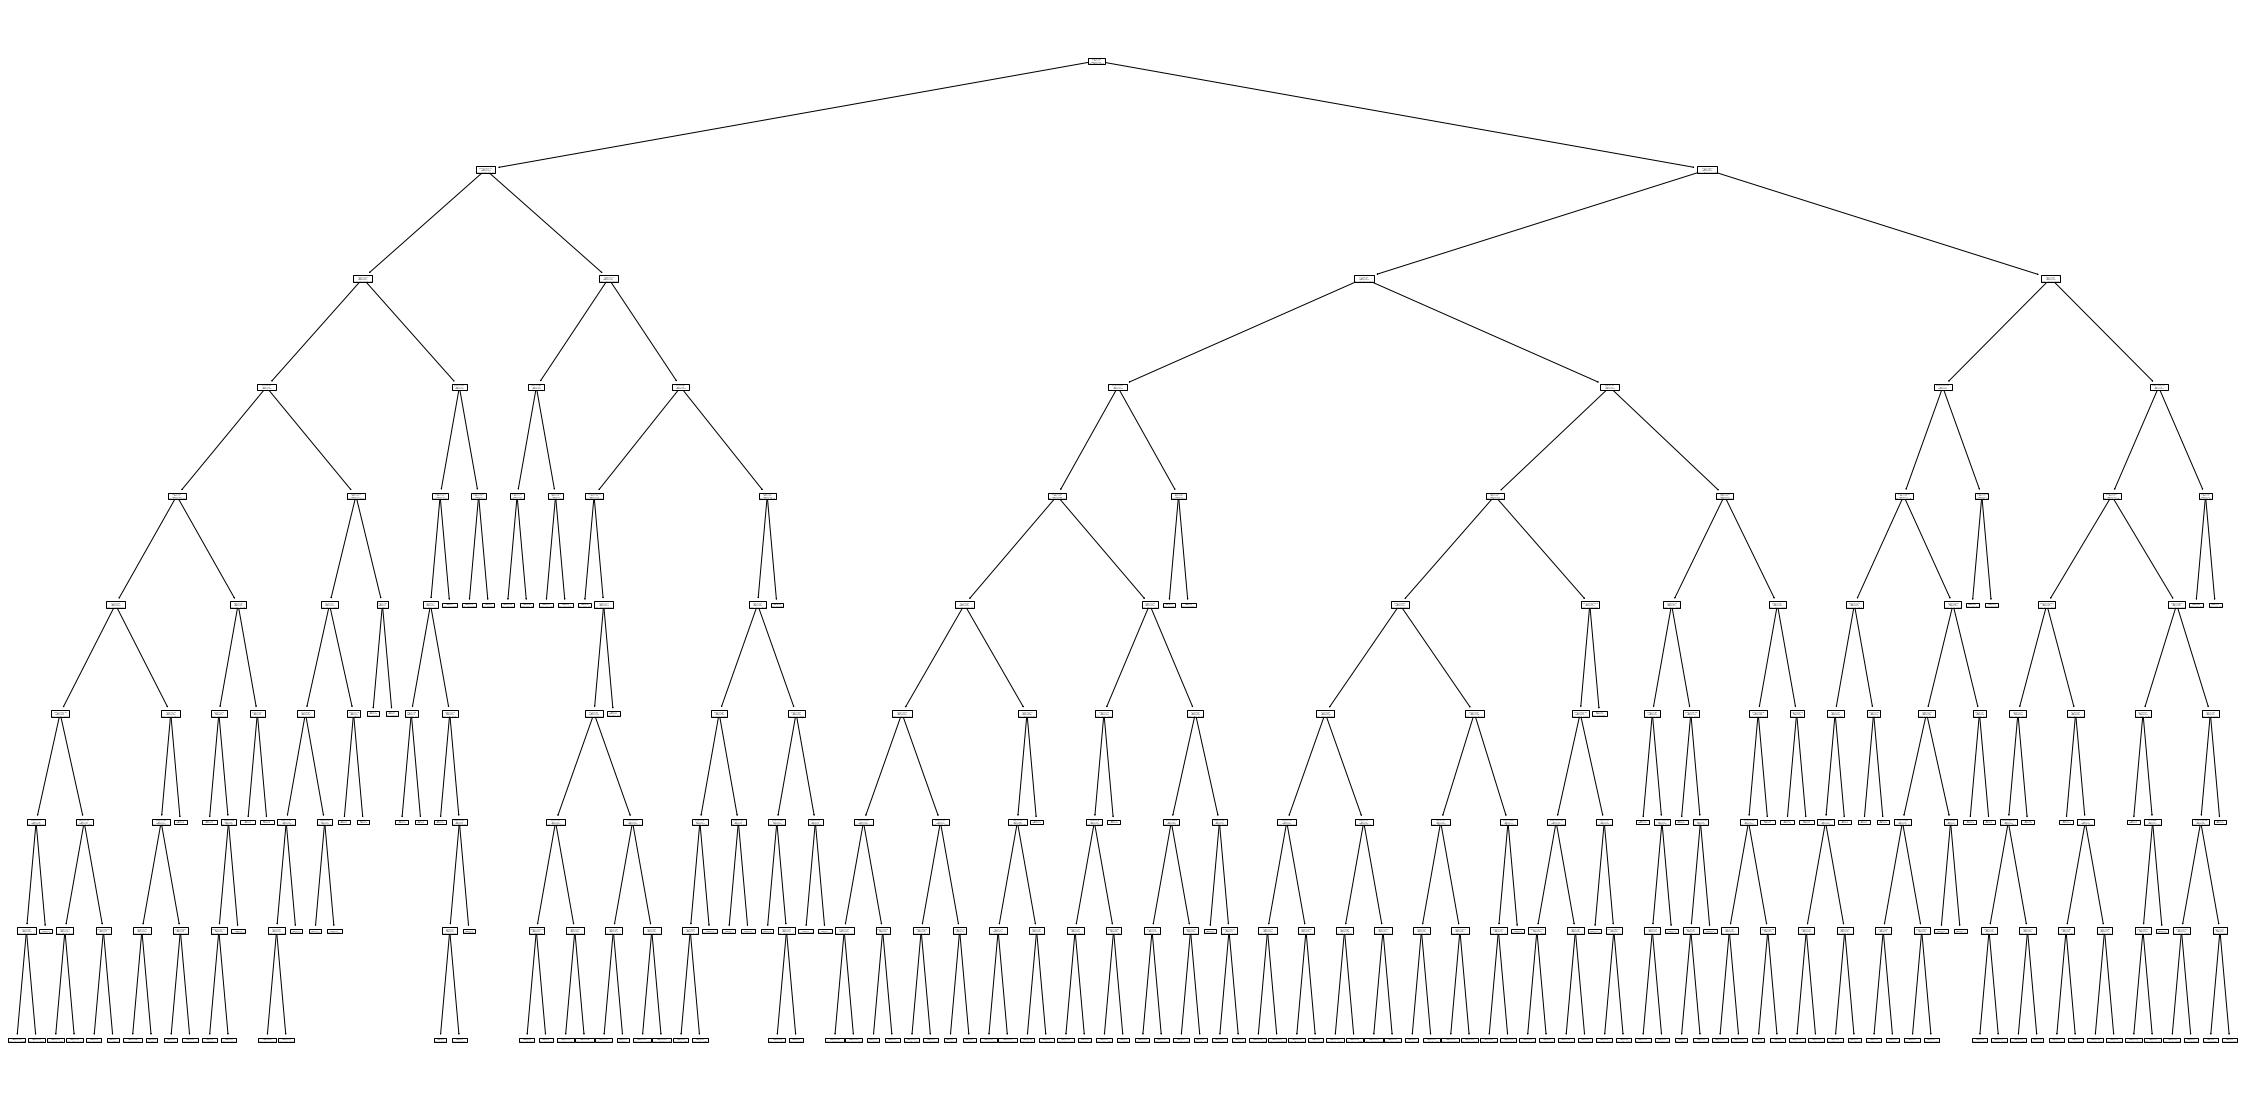

In [15]:
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(clf_7)

In [16]:
test_Data = np.ones((test_df.shape[0],test_df.shape[1]-1))
for i,row in test_df.iterrows():
    test_Data[i] = np.array(row[1:])
print(i)

75817


In [34]:
test_Pred1 = clf_1.predict(test_Data)
test_Pred2 = clf_2.predict(test_Data)
test_Pred3 = clf_3.predict(test_Data)
test_Pred4 = clf_4.predict(test_Data)
test_Pred5 = clf_5.predict(test_Data)
test_Pred6 = clf_6.predict(test_Data)
test_Pred7 = clf_7.predict(test_Data)

In [35]:
#Get Class Prediction as a data frame with header as Prediction
predt_1=pd.DataFrame(clf_1.predict(test_Data),columns=["Prediction"])
predt_2=pd.DataFrame(clf_2.predict(test_Data),columns=["Prediction"])
predt_3=pd.DataFrame(clf_3.predict(test_Data),columns=["Prediction"])
predt_4=pd.DataFrame(clf_4.predict(test_Data),columns=["Prediction"])
predt_5=pd.DataFrame(clf_5.predict(test_Data),columns=["Prediction"])
predt_6=pd.DataFrame(clf_6.predict(test_Data),columns=["Prediction"])
predt_7=pd.DataFrame(clf_7.predict(test_Data),columns=["Prediction"])

predt_7.head()

,Prediction
0,0
1,0
2,0
3,0
4,0


In [36]:
proba_7=pd.DataFrame(clf_7.predict_proba(test_Data))

proba_7.head()

,0,1
0,0.617536,0.382464
1,0.617536,0.382464
2,0.856848,0.143152
3,0.701116,0.298884
4,0.808058,0.191942


In [37]:
#Print Classification Report
#print(classification_report(Y_Train,pred))

In [38]:
result1_df = pd.DataFrame({"ID":np.array(ID),"TARGET":test_Pred1})
result1_df.to_csv('pre_Target1.csv',index=False)
result1_df = pd.DataFrame({"ID":np.array(ID),"TARGET":test_Pred2})
result1_df.to_csv('pre_Target2.csv',index=False)
result1_df = pd.DataFrame({"ID":np.array(ID),"TARGET":test_Pred3})
result1_df.to_csv('pre_Target3.csv',index=False)
result1_df = pd.DataFrame({"ID":np.array(ID),"TARGET":test_Pred4})
result1_df.to_csv('pre_Target4.csv',index=False)
result1_df = pd.DataFrame({"ID":np.array(ID),"TARGET":test_Pred5})
result1_df.to_csv('pre_Target5.csv',index=False)
result1_df = pd.DataFrame({"ID":np.array(ID),"TARGET":test_Pred6})
result1_df.to_csv('pre_Target6.csv',index=False)
result1_df = pd.DataFrame({"ID":np.array(ID),"TARGET":test_Pred7})
result1_df.to_csv('pre_Target7.csv',index=False)
proba_df=pd.DataFrame(clf_7.predict_proba(test_Data))
proba_df.to_csv('pre_Proba.csv',index=False)

In [22]:
#test_df

In [27]:
#test_Pred_kag_test = clf_1.predict(test_Data)
#result_df_kag_test = pd.DataFrame({"ID":np.array(ID),"TARGET":test_Pred_kag_test})
#result_df_kag_test.to_csv('result_test.csv',index=False)